In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import requests
import numpy as np
import os
from datetime import datetime
import sys  
import colorsys
%matplotlib inline

In [2]:
# make api call to flickr
# for some reason, flickr key isn't found (KeyError)

flickr_api_url = "https://www.flickr.com/services/rest/?method=flickr.photos.search&api_key=f8ac40eee0aacfa3be6dee0cbac63930" +\
            "&tags=sunset" +\
            "&text=sunset%20landscape" +\
            "&content_type=1" +\
            "&has_geo=1" +\
            "&sort=interestingness-desc" +\
            "&extras=date_taken%2C+geo%2C+url_o" +\
            "&format=json&nojsoncallback=1"
            # "&is_getty=1" +\             

flickr_res = requests.get(flickr_api_url)
if(flickr_res.status_code < 200 or flickr_res.status_code >= 300): 
    print('Unsuccessful request. Error code: {}'.format(flickr_res.status_code))
    sys.exit()
flickr_res = flickr_res.json()

In [11]:
# make api call to visualcrossing for given photo
VISUALCROSSING_API_KEY = os.environ["VISUALCROSSING_API_KEY"]
aPhoto = flickr_res['photos']['photo'][3]
format_string = "%Y-%m-%d %H:%M:%S"
dateTaken = datetime.strptime(aPhoto["datetaken"], format_string)
# print(type(aPhoto))
# print(aPhoto)
# print(aPhoto["latitude"])
# print(aPhoto["longitude"])
# print(aPhoto["datetaken"])
# print(str(dateTaken.date()))
# print(str(dateTaken.time()))

visualcrossing_api_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" +\
                        aPhoto["latitude"] + "%2C%20" + aPhoto["longitude"] + "/" +\
                        str(dateTaken.date()) + "/" + str(dateTaken.date()) +\
                        "?unitGroup=us" +\
                        "&key=" + VISUALCROSSING_API_KEY +\
                        "&contentType=json"

weather_res = requests.get(visualcrossing_api_url)

AttributeError: 'dict' object has no attribute 'status_code'

In [5]:
# write weather data of picture to database
if(weather_res.status_code < 200 or weather_res.status_code >= 300): 
    print('Unsuccessful request. Error code: {}'.format(weather_res.status_code))
    sys.exit()
weather_res = weather_res.json()

# nearest hour of sunset
nearest_hour = dateTaken.hour
print(nearest_hour)
if dateTaken.minute > 30:
    nearest_hour +=  1

# determine formatting for data
nearest_hour_data = weather_res["days"][0]["hours"][nearest_hour]
# print(nearest_hour_data)
print('Humidity : {}'.format(nearest_hour_data['humidity']))
print('Cloud Cover : {}'.format(nearest_hour_data['cloudcover']))
print('Sunset Time : {}'.format(weather_res['days'][0]['sunset']))
print(nearest_hour)


Unsuccessful request. Error code: 429


SystemExit: 

C:\Users\k3vnx\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


https://live.staticflickr.com/5812/30533223924_66ef376ab6_b.jpg
5.1057327496363065


<Figure size 720x720 with 0 Axes>

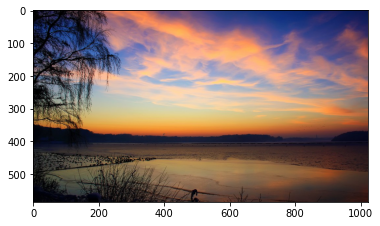

In [45]:
# get systematic sample of pixels from image to analyze (every twenty pixel, for example)
aPhoto = flickr_res['photos']['photo'][1]
aImgUrl = f'https://live.staticflickr.com/{aPhoto["server"]}/{aPhoto["id"]}_{aPhoto["secret"]}_b.jpg'
aPic = iio.imread(aImgUrl)

length = aPic.shape[0]
width = aPic.shape[1]
scale = 5
sys_sample_pic = aPic[0:length:scale, 0:width:scale, :]

# analyze photo

def score_sunset(image):
    sunset_pixel_counter = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rVal = image[i,j,0]
            gVal = image[i,j,1]  
            bVal = image[i,j,2]
            hVal = colorsys.rgb_to_hls(rVal, gVal, bVal)[0]*360
            if(hVal <= 45): # oranges are weighted less
                sunset_pixel_counter += 0.7
            elif(hVal >= 270): # reds and magentas are weighted fully
                sunset_pixel_counter +=1

    total_image_pixels = image.shape[1] *  image.shape[0]
    sunset_score = ((sunset_pixel_counter / total_image_pixels) * 10)
    return sunset_score

print(aImgUrl)
print(score_sunset(sys_sample_pic))

# display photo
aFig = plt.figure(figsize=(10, 10))
fig = plt.figure()
plt.imshow(aPic)

In [ ]:
# look at later for processing multiple images at once
'''
fig = plt.figure(figsize=(10, 5))
rows = 2
cols = 5

for i in range(10):
    # get and load pic
    photo = res['photos']['photo'][i]
    print(photo['title'])
    # print(photo["url_o"])
    imgUrl = f'https://live.staticflickr.com/{photo["server"]}/{photo["id"]}_{photo["secret"]}_b.jpg'
    aPhoto = iio.imread(imgUrl)

    # add aPhoto to fig
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(pic) 
'''